In [8]:

import pandas as pd
import numpy as np
from abupy import ABuSymbolPd
import matplotlib.pyplot as plt

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

amex_df.tail()


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.4431,4.8634
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.4792,4.8603
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.5120,4.8576
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.5418,4.8552
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.5689,4.8532


In [9]:

# 1. Visual Gold Ratio
# Find the max 
cs_max = amex_df.close.max()
# Find the min
cs_min = amex_df.close.min()

sp382 = (cs_max-cs_min) * 0.382 + cs_min
sp618 = (cs_max-cs_min) * 0.618 + cs_min

print('Visual Gold Ratio 382: {}'.format(round(sp382, 2)))
print('Visual Gold Ratio 618: {}'.format(round(sp618, 2)))



Visual Gold Ratio 382: 91.85
Visual Gold Ratio 618: 99.89


In [10]:

# 2. Statistical Gold Ratio
demo_list = [1, 1, 1, 100, 100, 100, 100, 100, 100, 100]
# While Visual Gold Ratio might give us (100-1) * 0.382 + 1 = 38.818
# This is not accurate statistically
from scipy import stats
sp382_stats = stats.scoreatpercentile(amex_df.close, 38.2)
sp618_stats = stats.scoreatpercentile(amex_df.close, 61.8)
print('Statistical Gold Ratio 382: {}'.format(sp382_stats))
print('Statistical Gold Ratio 618: {}'.format(sp618_stats))


Statistical Gold Ratio 382: 95.28816
Statistical Gold Ratio 618: 99.67184000000002


In [ ]:

from typing import NamedTuple
def plot_golden():
    # Find the max & min between visual & stats max
    upper618 = np.maximum(sp618, sp618_stats)
    lower618 = np.minimum(sp618, sp618_stats)
    upper382 = np.maximum(sp382, sp382_stats)
    lower382 = np.minimum(sp382, sp382_stats)
    
    # Drop close prices
    plt.plot(amex_df.close)
    
    # Plot Visual 382
    plt.axhline(sp382, 
                c='r')
    # Plot Stats 392
    plt.axhline(sp382_stats, 
                c='m')
    # Plot Visual 618
    plt.axhline(sp618, 
                c='g')
    # Plot Stats 618
    plt.axhline(sp618_stats, 
                c='k')
    
    # Fill 618 red
    plt.fill_between(amex_df.index,
                     upper618,
                     lower618,
                     alpha=0.5,
                     color="r")
    # Fill 382 green
    plt.fill_between(amex_df.index,
                     upper382,
                     lower382,
                     alpha=0.5,
                     color="g")
    
    # Finally, return NamedTuple
    goldTuple = NamedTuple('golden', 
                           [('upper618', float),
                            ('lower618', float),
                            ('upper382', float),
                            ('lower382', float)])
    return goldTuple(upper618,
                     lower618,
                     upper382,
                     lower382)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


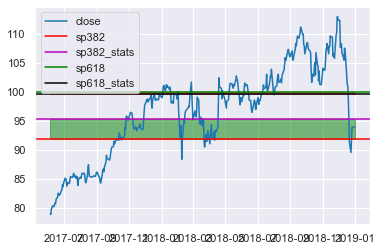

In [12]:
golden = plot_golden()
plt.legend(['close',
            'sp382',
            'sp382_stats',
            'sp618',
            'sp618_stats'],
           loc='best')


In [13]:
print('Theoretical Highest Profit: {}'.format(golden.upper618 - golden.lower382))


Theoretical Highest Profit: 8.033439999999999
